# Finite difference method


Example: We illustrate the finite difference method with $h = 0.2$ on the two-point BVP for the second-order scalar ODE
$$ y'' = 6t, \ 0 \leq t \leq 1, $$
with boundary conditions
$$ y(0) = 0, \qquad y(1) = 1. $$

[[-2.  1.  0. ...  0.  0.  0.]
 [ 1. -2.  1. ...  0.  0.  0.]
 [ 0.  1. -2. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ... -2.  1.  0.]
 [ 0.  0.  0. ...  1. -2.  1.]
 [ 0.  0.  0. ...  0.  1. -2.]]
[ 4.52314721e-05  9.04629441e-05  1.35694416e-04  1.80925888e-04
  2.26157360e-04  2.71388832e-04  3.16620304e-04  3.61851776e-04
  4.07083249e-04  4.52314721e-04  4.97546193e-04  5.42777665e-04
  5.88009137e-04  6.33240609e-04  6.78472081e-04  7.23703553e-04
  7.68935025e-04  8.14166497e-04  8.59397969e-04  9.04629441e-04
  9.49860913e-04  9.95092385e-04  1.04032386e-03  1.08555533e-03
  1.13078680e-03  1.17601827e-03  1.22124975e-03  1.26648122e-03
  1.31171269e-03  1.35694416e-03  1.40217563e-03  1.44740711e-03
  1.49263858e-03  1.53787005e-03  1.58310152e-03  1.62833299e-03
  1.67356447e-03  1.71879594e-03  1.76402741e-03  1.80925888e-03
  1.85449035e-03  1.89972183e-03  1.94495330e-03  1.99018477e-03
  2.03541624e-03  2.08064771e-03  2.12587919e-03  2.17111066e-03
  2.21634213e-03 -9.97738426

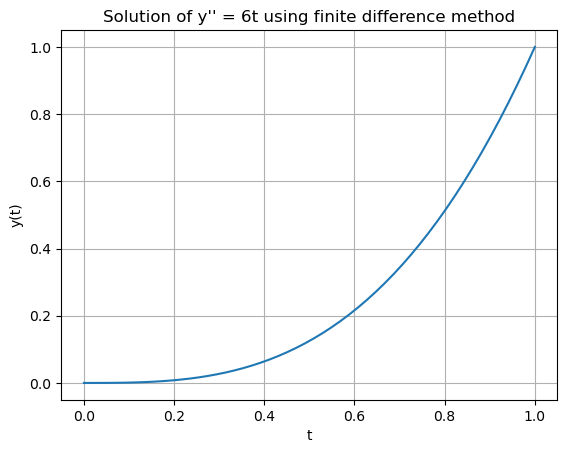

In [63]:
import numpy as np
from numpy.linalg import solve
import matplotlib.pyplot as plt

N = 50
h = 1/(N+1)

t0 = 0
T = 1

t=np.arange(t0,T+h,h)
d1 = -2*np.ones(N)
d2 = np.ones(N-1)
A = np.diag(d1) + np.diag(d2,1) + np.diag(d2,-1)
b = h*h*6*t[1:N+1]
b[-1] = b[-1] -1

print(A)
print(b)

y = solve(A,b)
print(y)
y = np.pad(y, 1)
y[-1] = 1
print(y)

# Plot the solution
plt.plot(t, y)
plt.xlabel("t")
plt.ylabel("y(t)")
plt.title("Solution of y'' = 6t using finite difference method")
plt.grid(True)
plt.show()

## More examples

### Laplace Equation

Consider the Laplace equation on the unit square
$$
\left \{
\begin{aligned}
u_{xx} + u_{yy} & = 0, \quad 0 \leq x, y \leq 1 \\
u(0,y) = u(1,y) & = 0, \quad 0 \leq y \leq 1  \\ 
u(x,0) & = 0, \quad 0 \leq x \leq 1 \\
u(x,1) & = 1, \quad 0 \leq x \leq 1,
\end{aligned}
\right .
$$
where $u$ is some time-independent function. Divide the $x$-interval [0,1] and $y$-interval [0,1] both into $N$ equal parts.

[ 0.          0.          0.         ... -0.18704649 -0.12684762
 -0.06449879]


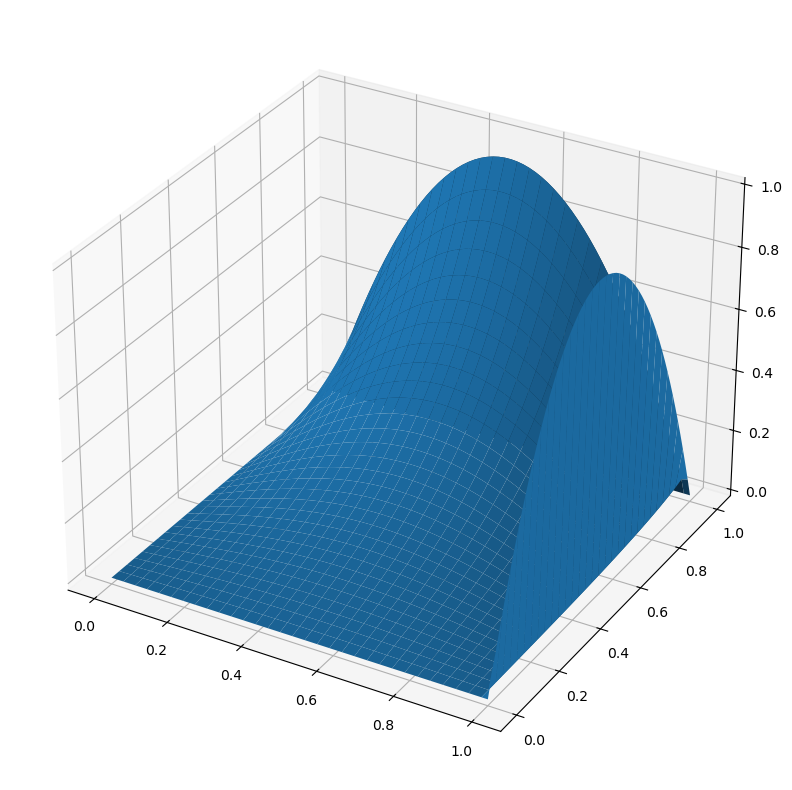

In [186]:
import numpy as np
import scipy.linalg

N = 60
h = 1/(N+1)

x0 = 0
xf = 1
y0 = 0
yf = 1

x=np.arange(x0,xf+h,h)
y=np.arange(y0,yf+h,h)

d1 = np.ones(N)
d2 = np.ones(N-1)
M = -4*np.diag(d1) + np.diag(d2,1) + np.diag(d2,-1)
MM = np.eye(N)

L = np.diag(d1)
LL = np.diag(d2,1) + np.diag(d2,-1)

A = np.kron(MM, M) + np.kron(LL,L)

def f(x):
    return 1-4*((x-0.5)**2)

B = np.zeros(N*N)
B[N*(N-1):N*N] = -f(x[1:N+1])
print(B)

u = solve(A,B)
u = np.reshape(u, (N, N))

u = np.pad(u, 1)
u[:,-1] = f(x)

r,t=np.meshgrid(x,y)

fig = plt.figure(figsize=(15,10))
ax = plt.axes(projection='3d')

ax.plot_surface(r,t,u)
plt.show()

Consider the Laplace equation on the unit square
$$
\left \{
\begin{aligned}
u_{xx} + u_{yy} & = 0, \quad 0 \leq x, y \leq 1 \\
u(0,y) = u(1,y) & = 0, \quad 0 \leq y \leq 1  \\ 
u(x,0) & = 1, \quad 0 \leq x \leq 1 \\
u(x,1) & = 1, \quad 0 \leq x \leq 1,
\end{aligned}
\right .
$$
where $u$ is some time-independent function. Divide the $x$-interval [0,1] and $y$-interval [0,1] both into $N$ equal parts.

## Hands-on Activity:

1. Solve the two-point BVP using the finite difference method with $h = 0.2$
$$ y'' = 4y, \ 0 \leq t \leq 1, $$
with boundary conditions
$$ y(0) = 1, \qquad y(1) = 3. $$

2. Elliptic Partial Differential Equations 

Consider the BVP
$$
\left \{
\begin{aligned}
\dfrac{\partial ^2 u}{\partial x^2} + \dfrac{\partial ^2 u}{\partial y^2} & = -2\pi^2 \sin(\pi x) \sin(\pi y), \quad 0<x<1, \quad 0<y<1 \quad \\
u(x,y) & = 0 \quad \text{if } x = 0,1 \text{ or } y = 0,1
\end{aligned}
\right .
$$
where $u$ is some time-independent function. Divide the $x$-interval [0,1] and $y$-interval [0,1] both into $n$ equal parts.